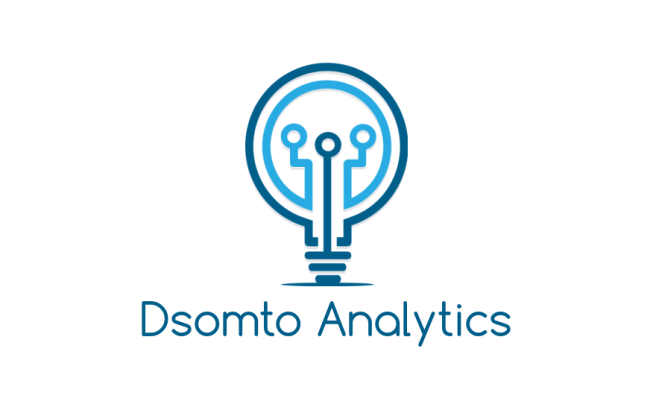

# This is an Analysis on Startups Ranked in the Top 1000 List
> The aim of this analysis is to know HOW the sectors, country and average employee growth all affect the growth of startups and if any of this factor can affect new startups

In [1]:
#importing important modules for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#I imported a CSV(Comma Separated Values) file in order to get the required data needed for this analysis
Companies = pd.read_csv('data/FT1000.csv')


In [3]:
#I called the dataframe to see if it needs data cleaning and inspection.
Companies.head(2)

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013


In [28]:
# I created another dataframe to make it more readable amd better to analyse
# I'm also creating some variables to make create extra columns on the dataframe
# Where AEG stands for Average Employee Growth
# Where ARG stands for Average Revenue Growth
ARGC= (((Companies['Revenue2020']-Companies['Revenue2017'])/Companies['Revenue2017'])*100)/3
AEGC= (((Companies['Employees2020']-Companies['Employees2017'])/Companies['Employees2017'])*100)/3

Company=pd.DataFrame({'Name': Companies['Name'],
                     'Country':Companies['Country'],
                     'Sector':Companies['Sector'],
                     'CAGR':Companies['CAGR'],
                     'Founding Year':Companies['FoundingYear'],
                     'Revenue in 2020':Companies['Revenue2020'],
                     'Revenue in 2017':Companies['Revenue2017'],
                     'Average Revenue Growth in % Since 2017 to 2020':ARGC,
                     'Employees in 2020':Companies['Employees2020'],
                     'Employees in 2017':Companies['Employees2017'],
                     'Average Employees Growth in % Since 2017 to 2020':AEGC,
                     'Ranked in 2021?':Companies['Ranked2021'],
                     'Ranked in 2020?':Companies['Ranked2020']})
Company.index=Companies['Rank']

Sctor= pd.DataFrame({'Name': Companies['Name'],'Sector':Companies['Sector'], 'Rank':Companies['Rank']})

Company


,Name,Country,Sector,CAGR,Founding Year,Revenue in 2020,Revenue in 2017,Average Revenue Growth in % Since 2017 to 2020,Employees in 2020,Employees in 2017,Average Employees Growth in % Since 2017 to 2020,Ranked in 2021?,Ranked in 2020?
Rank,,,,,,,,,,,,,
1,Swappie,Finland,Technology,477.43,2016,97611814,507000,6384.274425,218,1,7233.333333,No,No
2,Kilo Health,Lithuania,Health,450.05,2013,57318766,344428,5513.908858,177,10,556.666667,No,No
3,OCI,UK,Financial Services,409.59,2012,568322073,4325512,4346.279785,32,4,233.333333,No,No
4,OnlyFans,UK,Technology,393.63,2016,316732986,2652185,3947.447118,800,4,6633.333333,No,No
5,Enpal,Germany,Energy,386.88,2017,56109613,486165,3813.756509,365,9,1318.518519,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,peopleForecast,Germany,Technology,36.59,2014,2086411,818658,51.619154,45,15,66.666667,No,No
997,Digitalpa,Italy,Management Consulting,36.59,2014,1731340,679440,51.606225,12,41,-23.577236,No,No
998,Faktenkontor,Germany,Advertising,36.59,2003,30967000,12153143,51.602171,150,100,16.666667,No,No


In [29]:
Company.loc[824]

Name                                                              Exadi
Country                                                           Spain
Sector                                              Sales and Marketing
CAGR                                                              42.65
Founding Year                                                      2008
Revenue in 2020                                                42525086
Revenue in 2017                                                14649568
Average Revenue Growth in % Since 2017 to 2020                63.427395
Employees in 2020                                                    44
Employees in 2017                                                    21
Average Employees Growth in % Since 2017 to 2020              36.507937
Ranked in 2021?                                                      No
Ranked in 2020?                                                      No
Name: 824, dtype: object

## Sectors
> In this section we are going to see the sectors with the most companies. We are also going to try to predict why there is a disproportionate distribution on sectors on the list if any

We are going to this by 
* Creating a series to have a 2d view of it
* Plotting a bar chat to see the graphical view
* Making logical inferences as to why the secors may contribute to the growth of startups
___

In [5]:
#This is a variable to get the height of the bar chat
height=Company.groupby('Sector').count()['Name']

In [6]:

height

Sector
Advertising                      33
Aerospace & Defence               6
Agricultural Commodities          7
Architecture                      2
Automobiles                      26
Batteries                         1
Beauty                            5
Chemicals & Pharmaceuticals       8
Construction                     89
Cyber Security                   10
Ecommerce                        65
Education                        15
Energy                           42
Fashion                          10
Financial Services               28
Fintech                          26
Food & Beverage                  20
Games industry                    4
Health                           43
Industrial Goods                 36
Insurance                         3
Interiors                        12
Law                               2
Management Consulting            22
Media                            11
Personal & Household Goods       10
Pharmaceuticals                   5
Precious metals      

Text(0, 0.5, 'Sector')

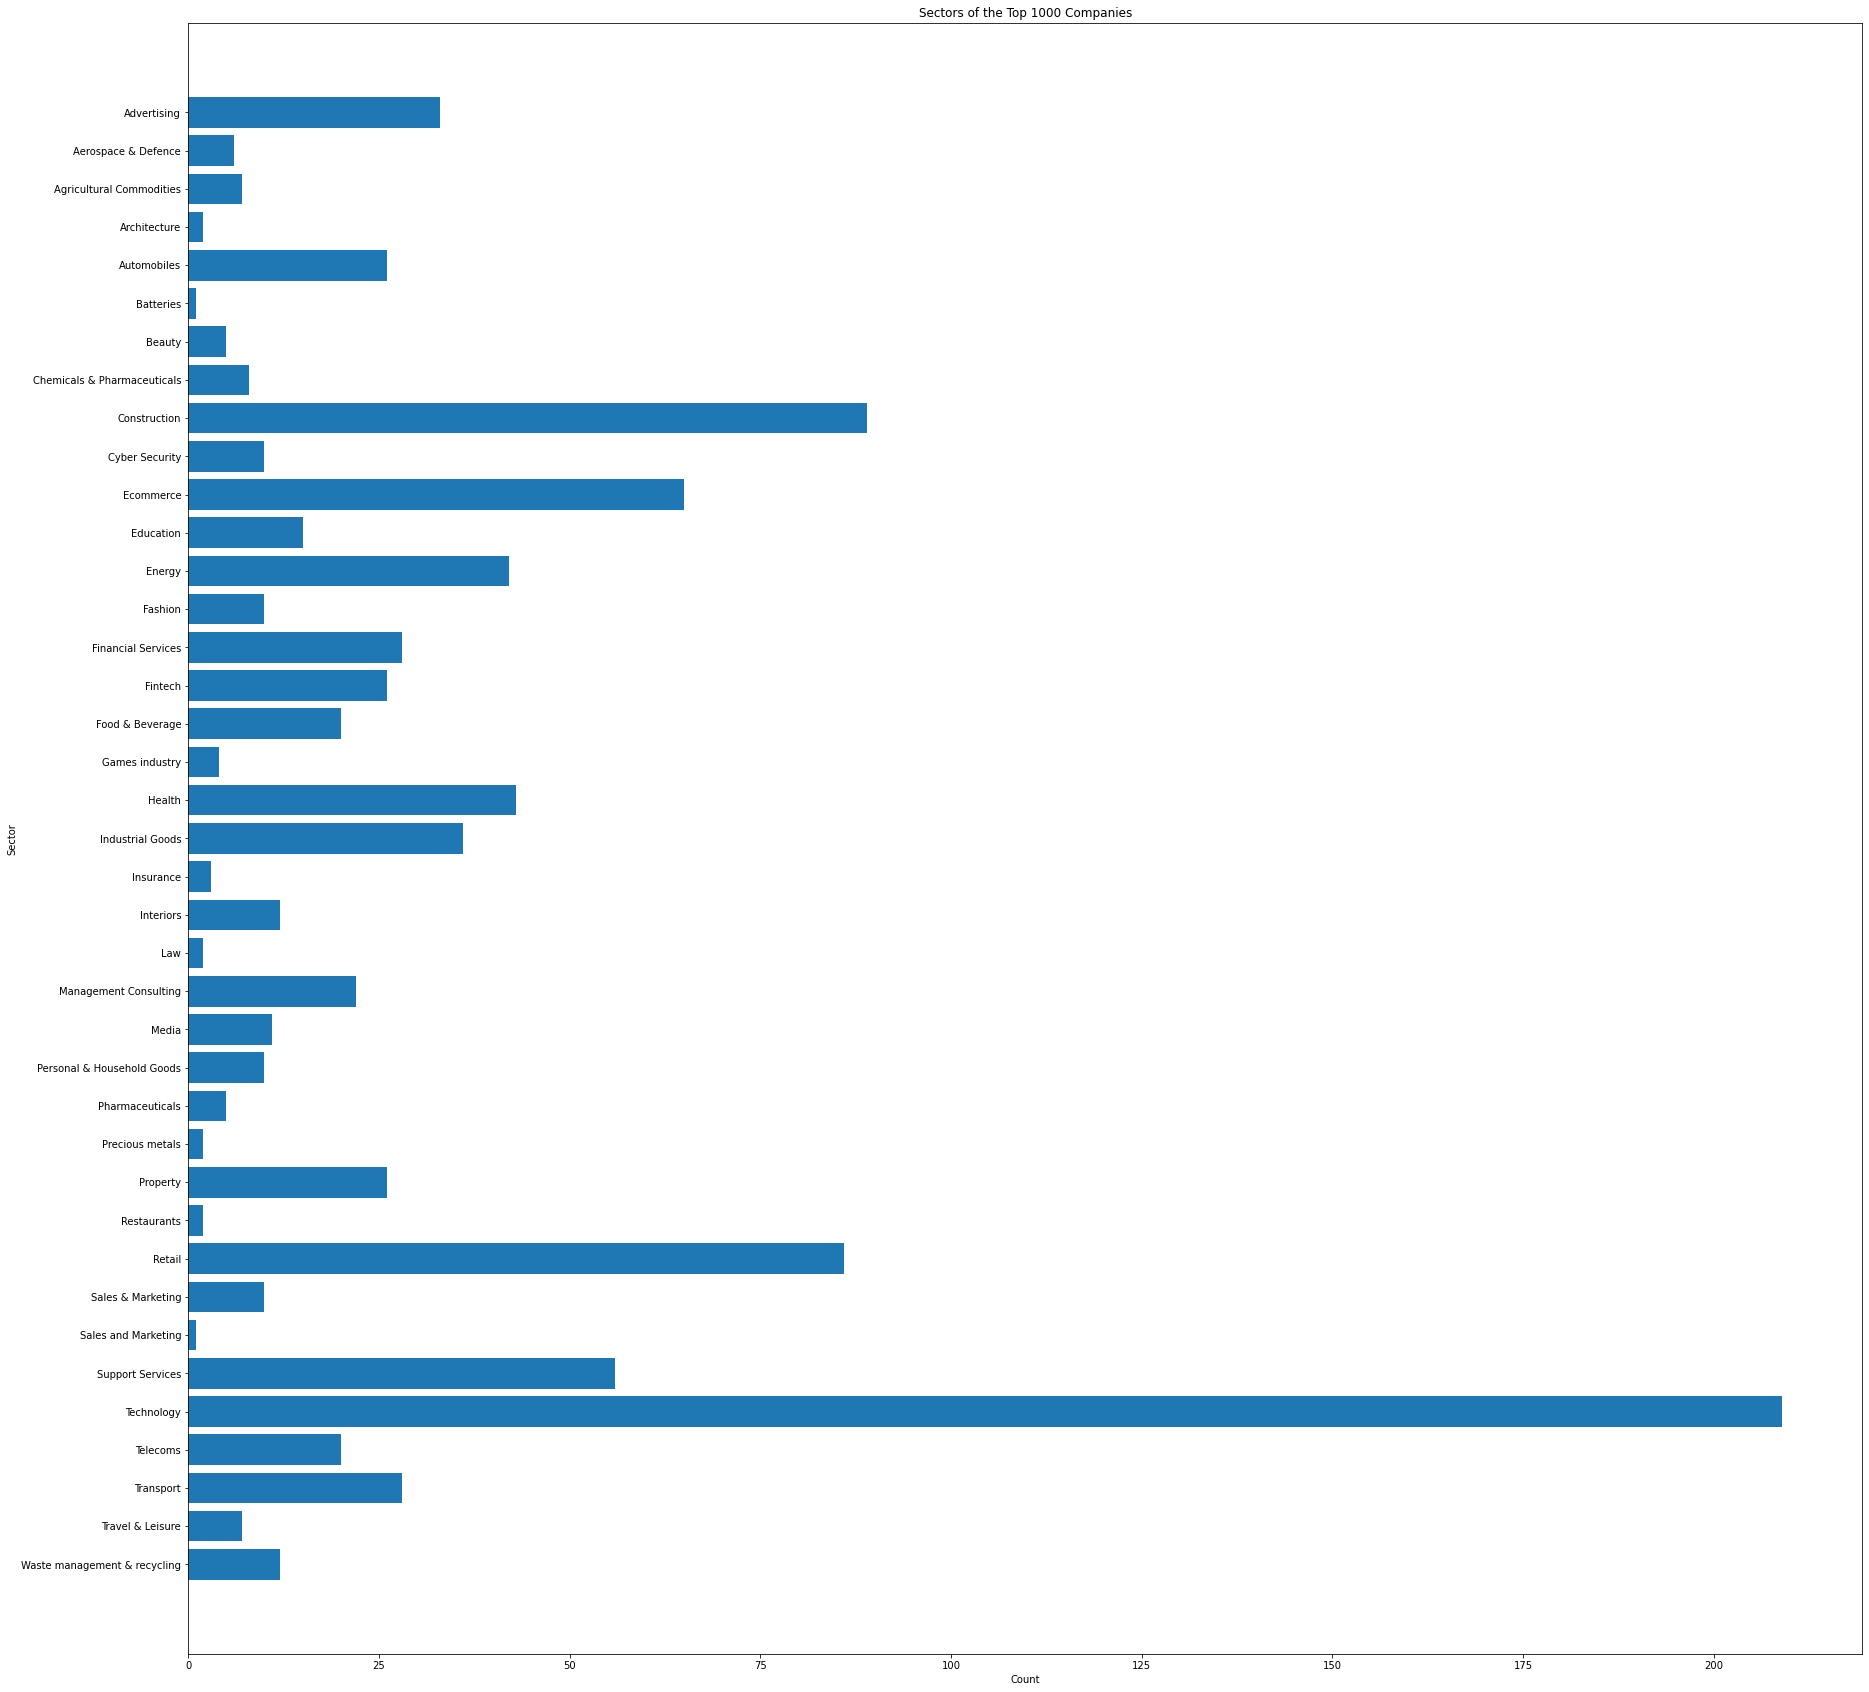

In [7]:
#I created a custom size for my graph and created a vertical bar chat with the name and count well represented
plt.figure(figsize=(30,30))
plt.barh(height.index, height)
plt.gca().invert_yaxis()
plt.title("Sectors of the Top 1000 Companies")
plt.xlabel('Count')
plt.ylabel('Sector')

### *Analysis*

> From the above analysis, it is clearly seen that "Technonlogy Sectors" are well populated in the list accounting for over 20% of the companies in the list. It is wise to note that most of the companies are regarded as 'new-generation' which implies they began around 2010. This goes further to tell us how much the world is changing and moving to technology.

> Apart from Technology, there are two sectors that rank second and they account for close to 9% each of the total companies on the list. This is in part due to the population rise in the world which has led to development of roads and infrastructure and has also contributed to the increase in retail services around the world. These are:-
>>* Construction.
>>* Retail Sectors. 

> Conclusion:- So from the 'SECTOR' section, we are able to see that the companies that thrive most are those that are able to ride on the momentum of technological advancement to solve problems and also those that can increase the standard of living for the population.


## Did Average Employee Growth play a role in increasing revenue?

> In this section we are going to see if there was an effect in average employee growth in most companies. We are going to make logical conclusions based on the data visualizations we get here

We are going to this by 
* Creating a dataframe to show employee growth over the past three(3) years
* Greate a Benchmark variable which will try to indicate a correlation in the growth
* Plotting a line chat to see the graphical view and use the benchmark variable to check for any correlation
* Making logical inferences as to why the Employee growth may contribute to the growth of startups
___

In [8]:
#This is the dataframe created to have a 2d view of the data
employee=Company[['Average Employees Growth in % Since 2017 to 2020']]
employee.index= Company['Name']
employee.head(60)

,Average Employees Growth in % Since 2017 to 2020
Name,
Swappie,7233.333333
Kilo Health,556.666667
OCI,233.333333
OnlyFans,6633.333333
Enpal,1318.518519
MR Consulting,116.666667
Thriva,125.000000
Exotec,411.111111
Winelivery,300.000000


In [9]:
#This is a benchmark it will appear as a straight line on the graph to show any deviations in trend
Bench_Mark = np.ones(1000, dtype=int)*300

In [10]:
#I created a new column so it can show on the graph
employee['Average Growth Index']=Bench_Mark

C:\Users\user\AppData\Local\Temp\ipykernel_10012\591310401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee['Average Growth Index']=Bench_Mark


<AxesSubplot:xlabel='Name'>

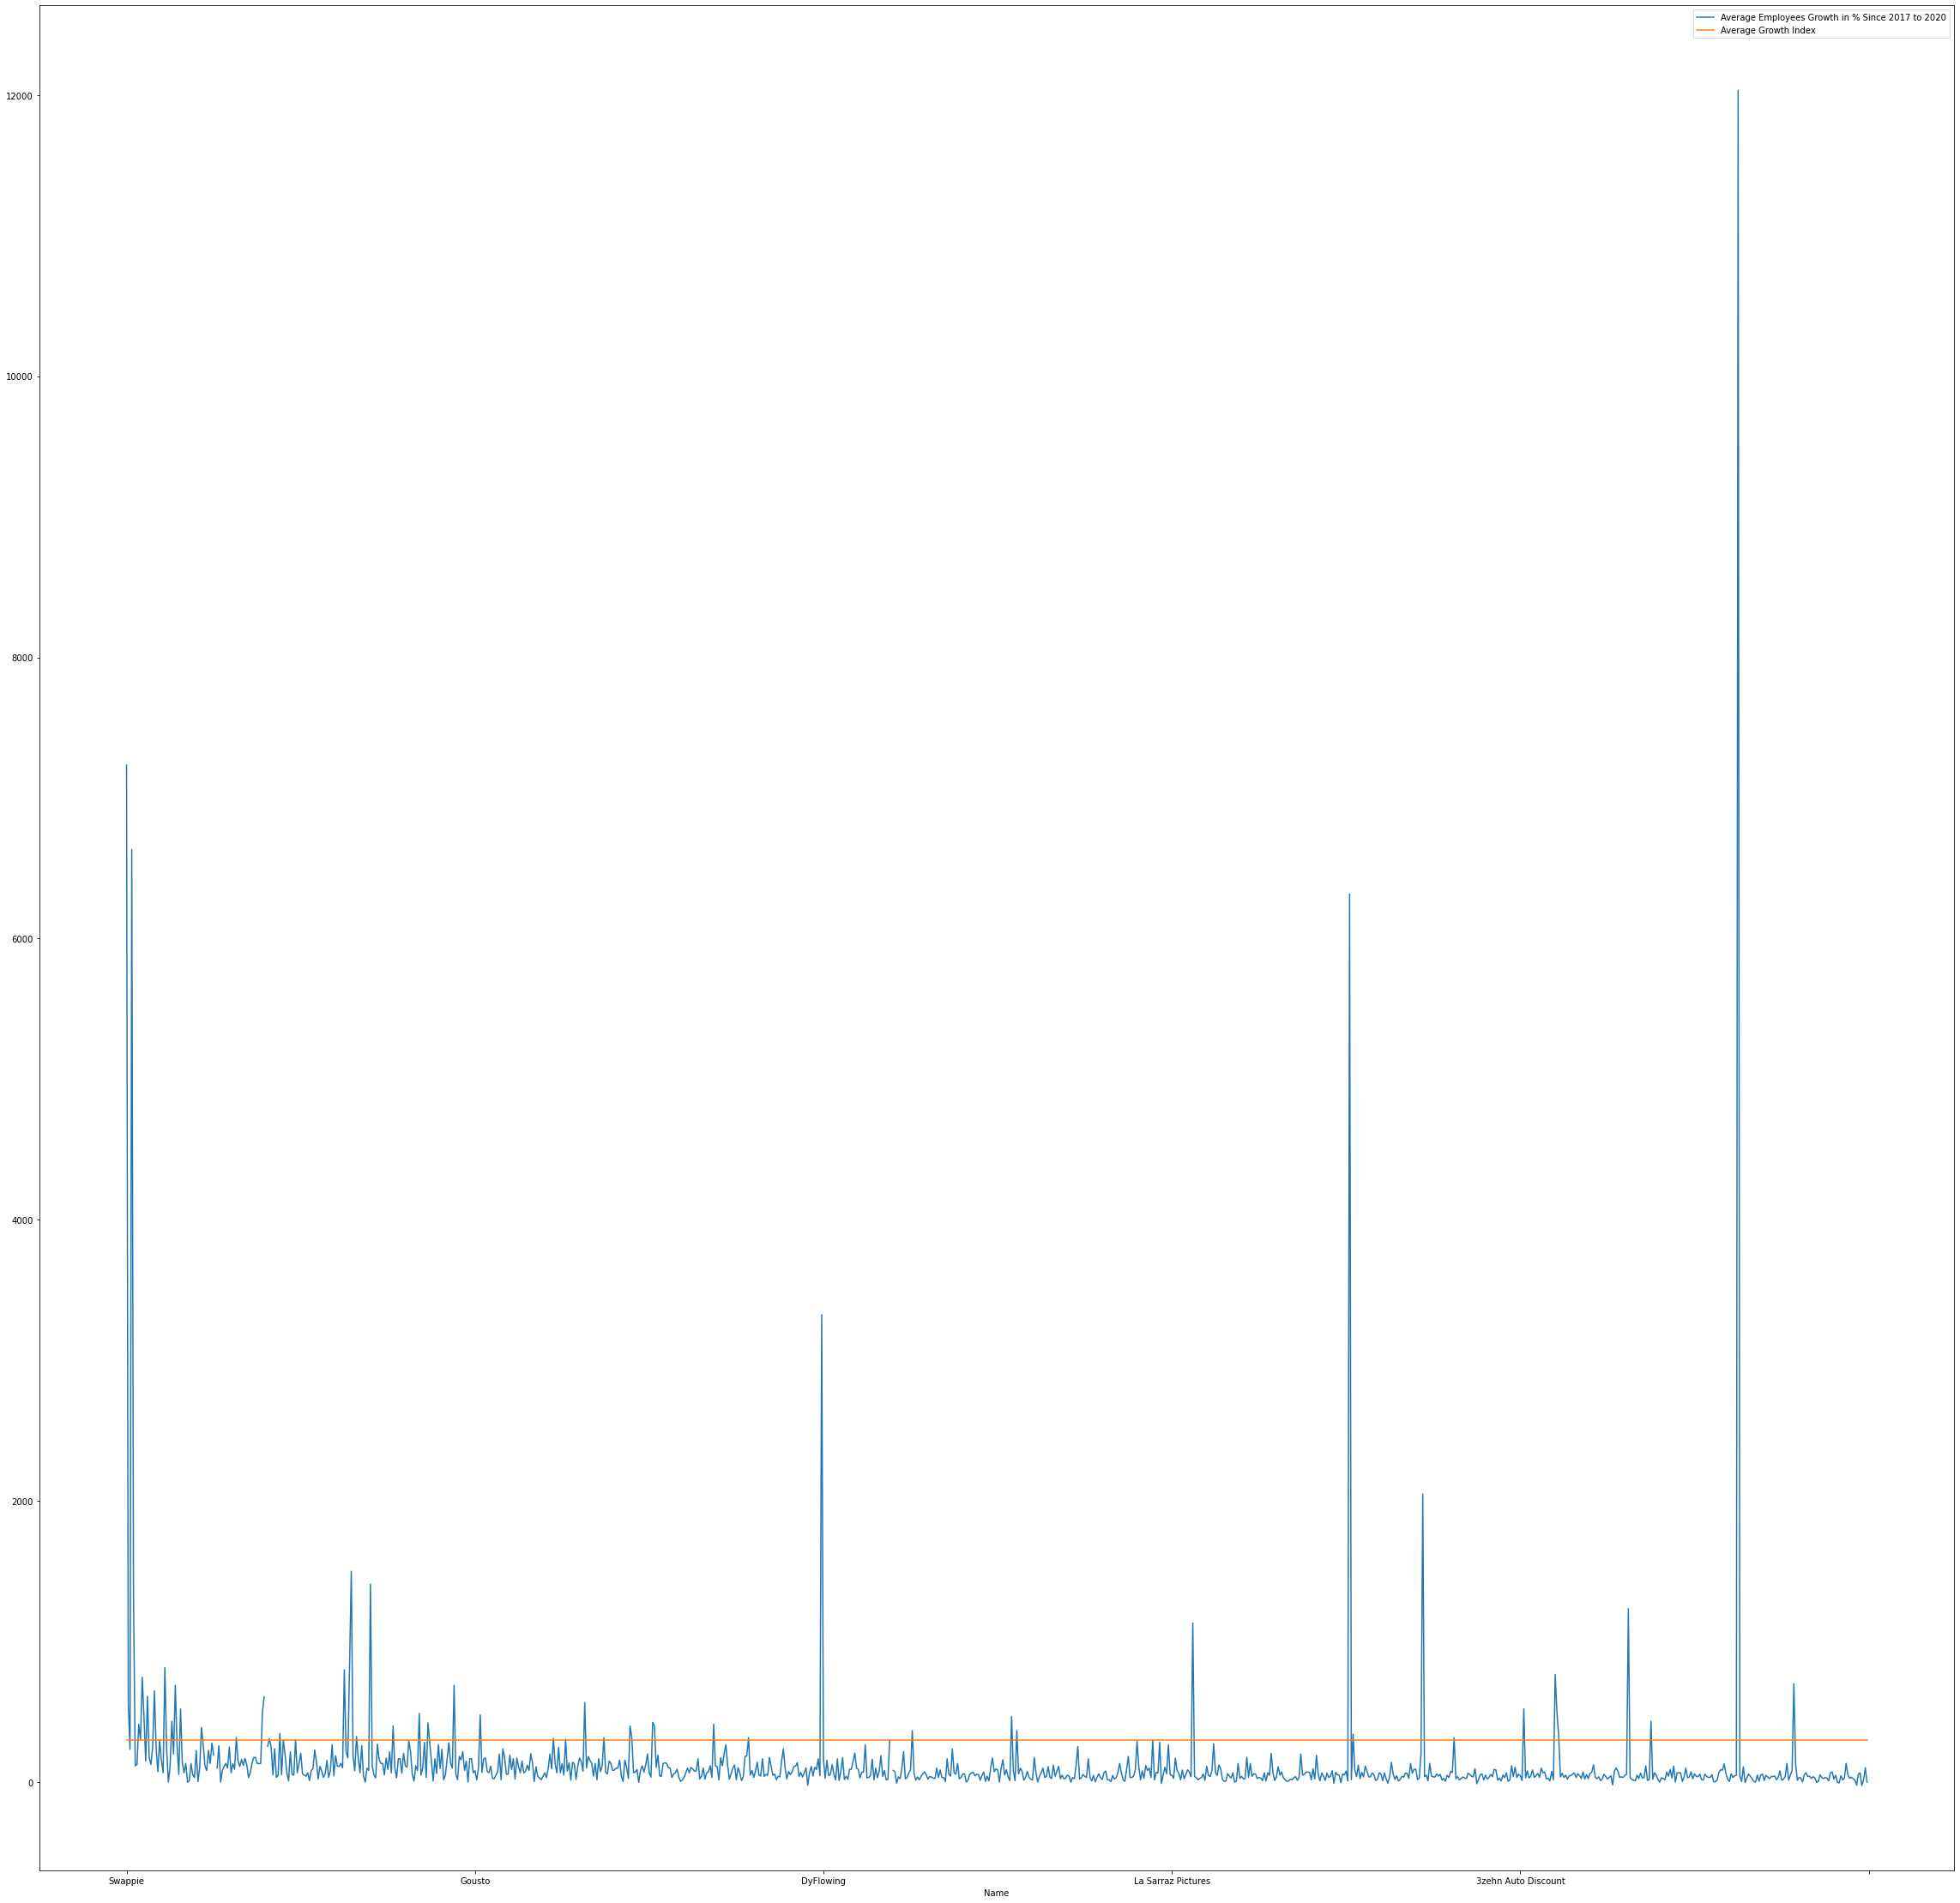

In [11]:
#This is the line graph of the Averaage Employee Geowth
employee.plot(figsize=(40,40))

<AxesSubplot:xlabel='Name'>

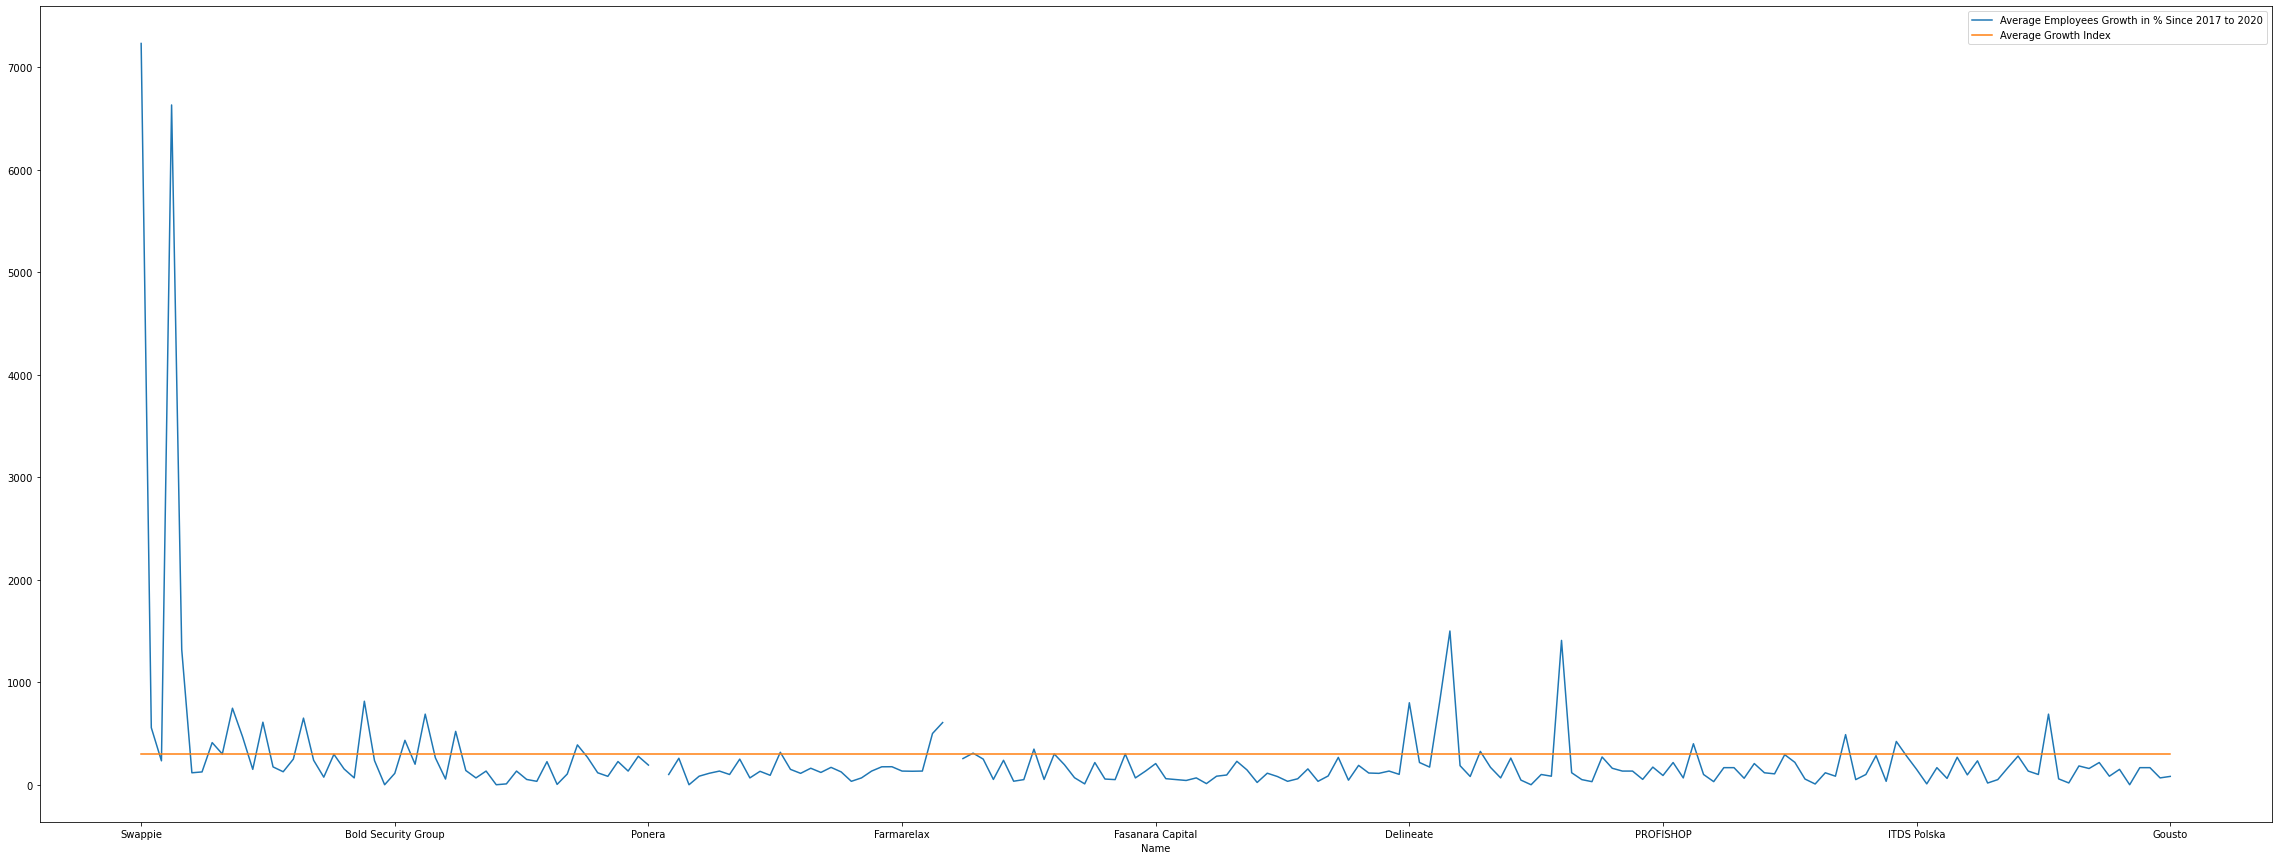

In [12]:
#This gives a close look in to the graph and there isnt much of a correlation here.
employee.loc['Swappie':'Gousto'].plot(figsize=(40,15))

### *Analysis*

> From the analysis it seems that large employee growth over a period of three years did not have any reasonable correlation with average revenue increase. The bench mark as clearly seen with the orange line is 300%. So average employee growth above that didn't do much to the revenue increase over a long time.

## Does Country affect the growth of Companies?

In [13]:
#This creates a series that guves me the coountry number and also the arranged name alphbetically
Country_value= Company.groupby('Country').count()['Name']
Country_name = Country_value.index


<BarContainer object of 30 artists>

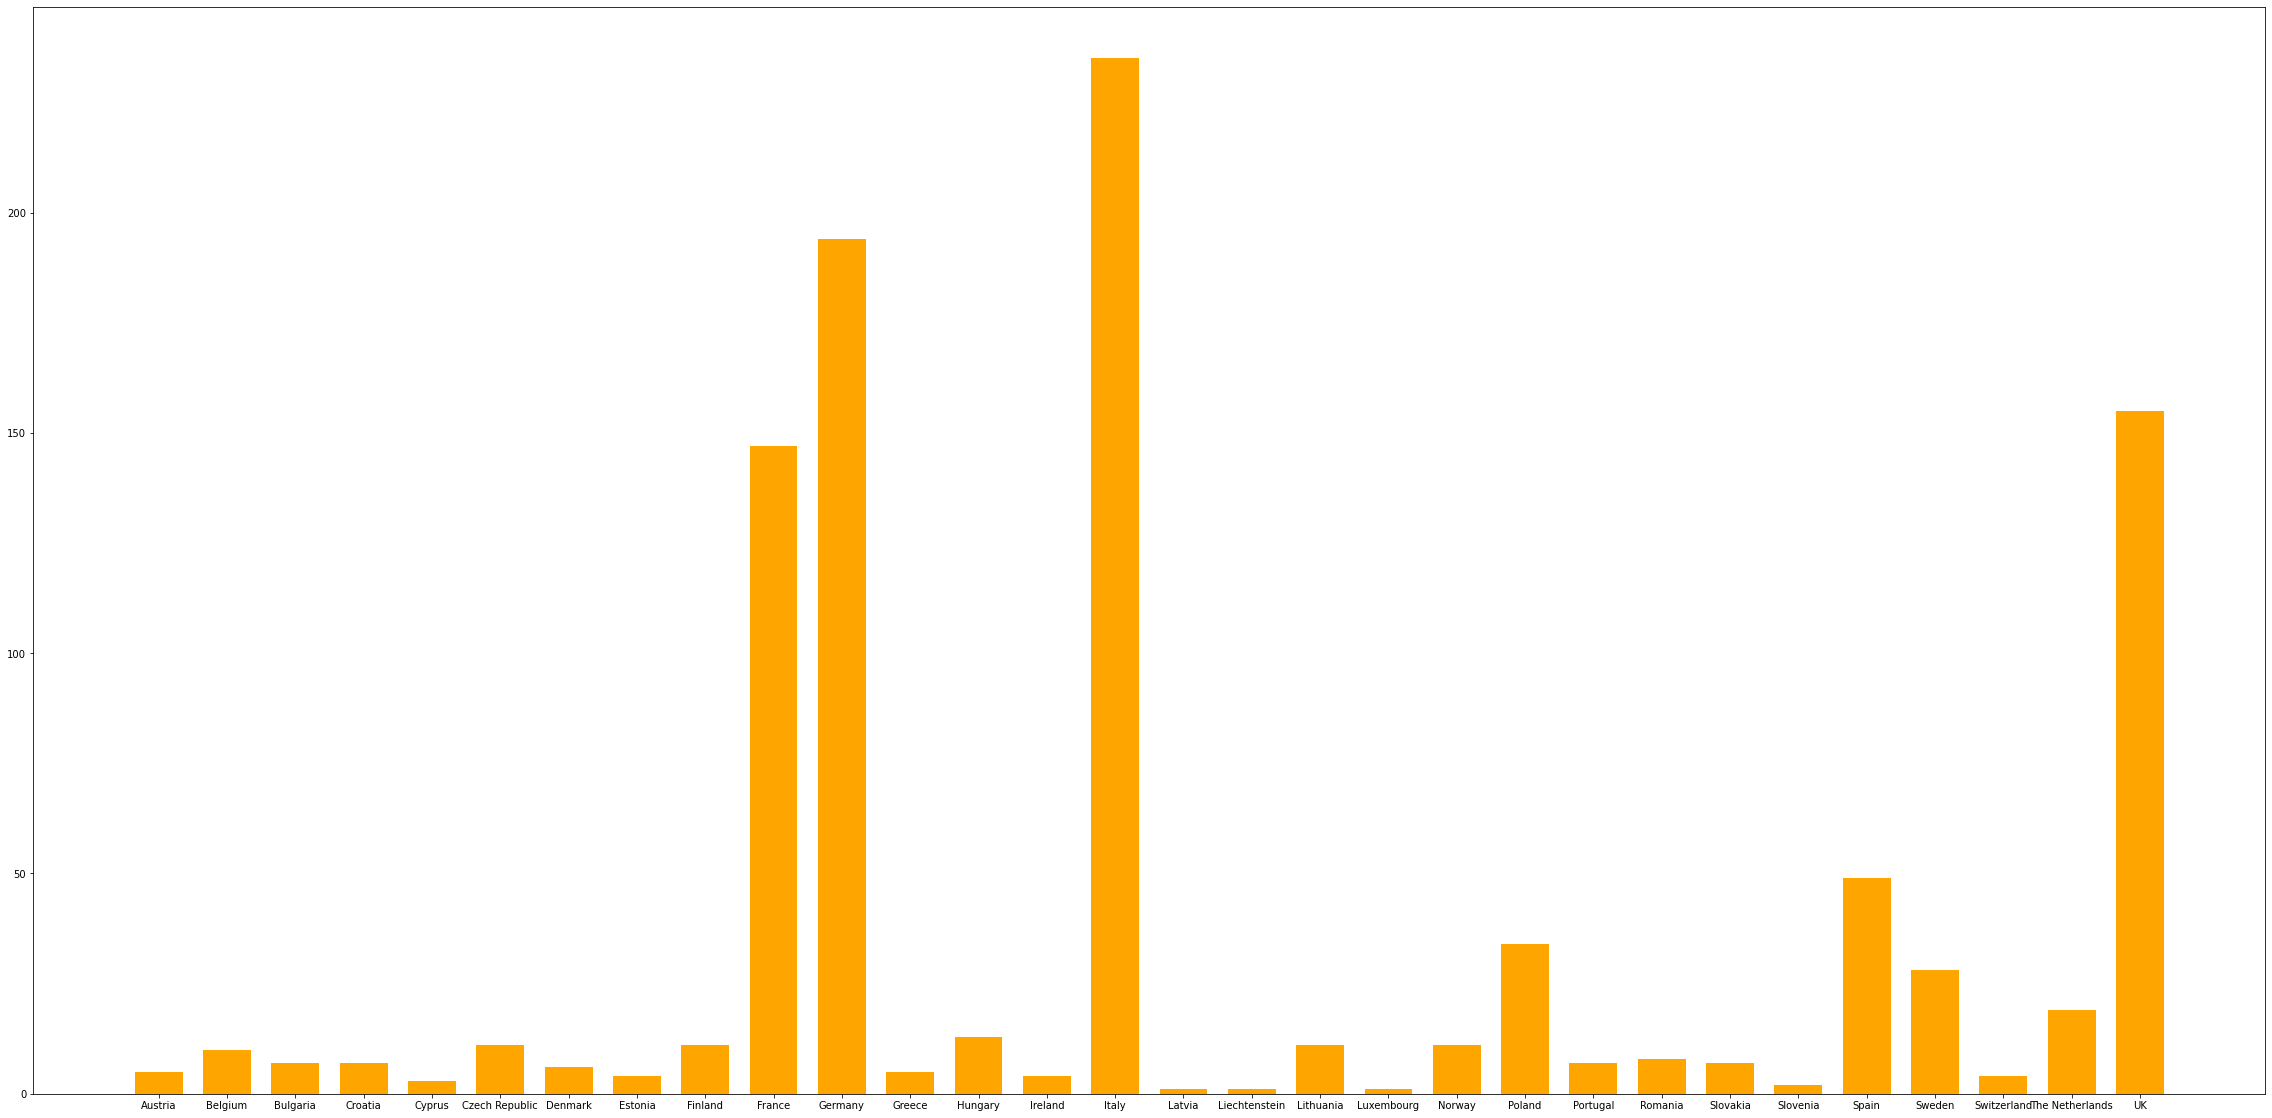

In [14]:
#This is a the code to plot a barchat
plt.figure(figsize=(40,20))
plt.bar(Country_name,Country_value, color= 'orange', width=.7)

>THE TOP COUNTRIES WITH THE MOST COMPANIES ARE
* Italy
* Germany
* France
* United Kingdom
* Spain.

>>These countries have laws in place to make companies excel like low tax and flexible tax for the first years.

>>They also provide funding to young and promising startups which serves as an incentives for other companies as well.

>>Lastly, the government in these locations has created programs for startups to make it easier for them to attract talents that are best suited for the companies.

### *FINAL CONCLUSION*

So from the analysis, we can see that there are several factors to consider when starting a company which are Sector, Government laws and many more. 

>The Sector you are going into should be able to increase the standard of living for the rising population to have a better chance of succeeding. We also see that some sectors have a higher chances of success than some sectors. So considering a sector should be a huge delibeartion. Also, entrepeneurs should try to adapt to the rise in technological advancements no matter the sector. This will lead to more efficiency in the company and they will be able to stay up to date with technological progress in their sectors 

>Also, the entrepreneur should ensure he start out at a place with favourable governments laws that aim at making his start up flourish. Most small companies fail because of kaws and policies that aim at reducing their revenue which may hamper growth. Startups should ensure that the location has considerable laws which may favor the startup. It is wise to note that compnies that deal with extraction and manufacturing of materials should be situated close to the source of the material to avoid high transportation budget which will affect revenue

#### Special Thanks to

* Altschool Africa.

* My Instrustor - Mary Miti(For giving us the resources to get data from and for your insightful teachings).

You guys rock!!!!!!

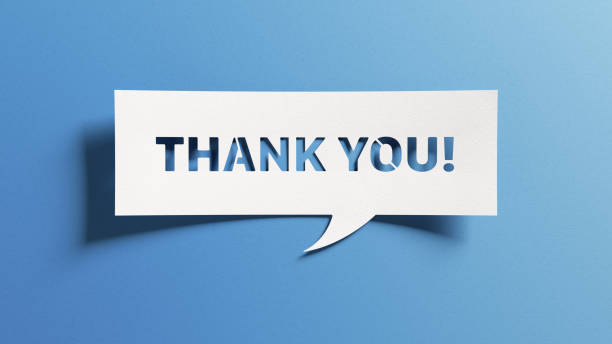